# Import libraries and construct environment

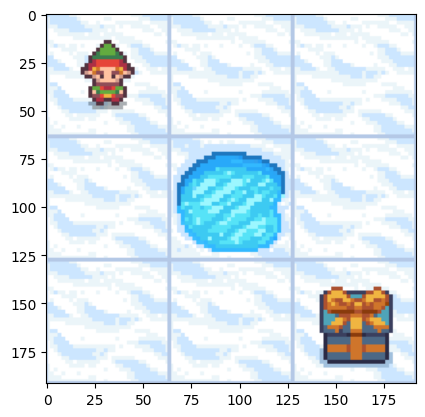

In [ ]:
# Load libraries
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
from keras.optimizers import Adam
from keras.layers import Dense
from keras.models import Sequential
from collections import deque
import imageio
import pandas as pd

# Define environment map
custom_map = [
    'SFF',
    'FHF',
    'FFG'
]

# Initialize the environment\
env = gym.make('FrozenLake-v1', desc=custom_map, is_slippery=False, render_mode='rgb_array')
state_size = env.observation_space.n    # Number of states
action_size = env.action_space.n    # Number of actions of this game: four, 0: left, 1:down, 2: right, 3: up.
env.reset()    # Reset environment, i.e., set agent position to state 0
plt.imshow(np.squeeze(env.render()))    # Visualize environment map

# Define agent

In [ ]:
# Define agent attributes and methods
class Agent:
    def __init__(self, state_size, action_size):
        self.Q = {}  # Q-table as a dictionary
        self.learning_rate = 0.1
        self.epsilon = 1
        self.min_eps = 0.01
        self.eps_decay = 0.003
        self.gamma = 0.9
        self.state_size = state_size
        self.action_size = action_size
        self.episode = 0
        self.max_steps = 50    # Maximum number of steps the agent can carry out in an episode
        self.train_episodes = 501    # Number of training episodes

    # Convert state to string index
    def state_to_index(self, state):
        return str(state)

    # Get action when agent is at a certain state
    def action(self, state):
        if random.random() > self.epsilon:
            state_index = self.state_to_index(state)
            if state_index not in self.Q:
                self.Q[state_index] = [0] * self.action_size
            return self.Q[state_index].index(max(self.Q[state_index]))  # Greedy action
        return env.action_space.sample()  # Random action

    # Update Q-values based on the observed experience
    def update_q_values(self, state, action, reward, new_state, terminated):
        state_index = self.state_to_index(state)
        new_state_index = self.state_to_index(new_state)

        if state_index not in self.Q:
            self.Q[state_index] = [0] * self.action_size
        if new_state_index not in self.Q:
            self.Q[new_state_index] = [0] * self.action_size

        max_q = max(self.Q[new_state_index])
        self.Q[state_index][action] += self.learning_rate * (reward + self.gamma * max_q - self.Q[state_index][action])




# Train the agent

In [ ]:
#Initialize a reinforcement learning agent
agent = Agent(state_size, action_size)
reward_episodes = []
step_episodes = []
epsilon_episodes = []


for episode in range(agent.train_episodes):
    agent.episode = episode
    state = env.reset()
    reward = 0
    terminated = False

    for step in range(agent.max_steps):
        action = agent.action(state)
        new_state, reward, terminated, info = env.step(action)
        agent.update_q_values(state, action, reward, new_state, terminated)
        state = new_state

        if terminated:
            break

    print("Episode: " + str(agent.episode) + ", Steps: " + str(step) + ", epsilon: " + str(round(agent.epsilon, 2)) + ", Reward: " + str(reward))
    reward_episodes.append(reward)
    step_episodes.append(step)
    epsilon_episodes.append(agent.epsilon)

    if agent.epsilon > agent.min_eps:
        agent.epsilon = np.exp(-agent.eps_decay * agent.episode)

print('Average success rate of training episodes: ', round(sum(reward_episodes) / agent.train_episodes, 2))


Episode: 0, Steps: 4, epsilon: 1, Reward: 0.0
Episode: 1, Steps: 15, epsilon: 1.0, Reward: 1.0
Episode: 2, Steps: 2, epsilon: 1.0, Reward: 0.0
Episode: 3, Steps: 7, epsilon: 0.99, Reward: 1.0
Episode: 4, Steps: 4, epsilon: 0.99, Reward: 1.0
Episode: 5, Steps: 11, epsilon: 0.99, Reward: 0.0
Episode: 6, Steps: 1, epsilon: 0.99, Reward: 0.0
Episode: 7, Steps: 2, epsilon: 0.98, Reward: 0.0
Episode: 8, Steps: 1, epsilon: 0.98, Reward: 0.0
Episode: 9, Steps: 4, epsilon: 0.98, Reward: 0.0
Episode: 10, Steps: 16, epsilon: 0.97, Reward: 0.0
Episode: 11, Steps: 8, epsilon: 0.97, Reward: 1.0
Episode: 12, Steps: 1, epsilon: 0.97, Reward: 0.0
Episode: 13, Steps: 4, epsilon: 0.96, Reward: 0.0
Episode: 14, Steps: 2, epsilon: 0.96, Reward: 0.0
Episode: 15, Steps: 5, epsilon: 0.96, Reward: 0.0
Episode: 16, Steps: 2, epsilon: 0.96, Reward: 0.0
Episode: 17, Steps: 2, epsilon: 0.95, Reward: 0.0
Episode: 18, Steps: 2, epsilon: 0.95, Reward: 0.0
Episode: 19, Steps: 7, epsilon: 0.95, Reward: 0.0
Episode: 20,

# Plot cumulative average success rate over training episodes

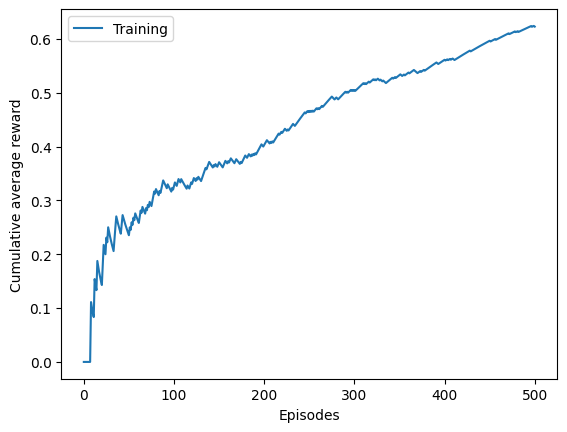

In [ ]:
# Plot cumulative average reward (or success rate) of the training phase.
# This shows how well the agent performs in the training phase.
df_reward_episodes = pd.DataFrame(reward_episodes)
cumulative_average_rewards = df_reward_episodes.expanding().mean()
plt.plot(cumulative_average_rewards)
plt.ylabel('Cumulative average reward')
plt.xlabel('Episodes')
plt.legend(['Training'], loc='upper left')
matplotlib.rcParams.update({'font.size': 10})
plt.show()

# Plot cumulative average steps of over training episodes

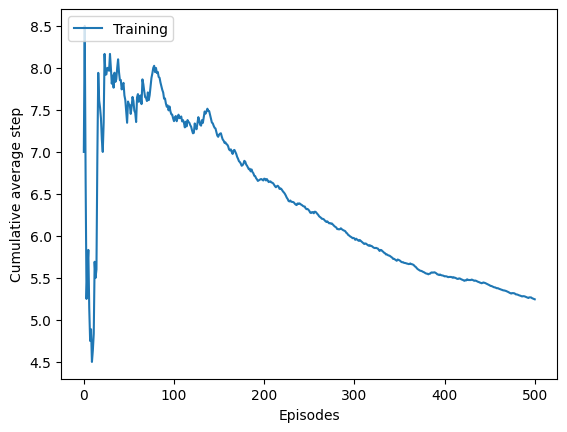

In [ ]:
# Plot cumulative average steps of the training phase.
# This shows how well the agent performs in the training phase.
df_step_episodes = pd.DataFrame(step_episodes)
cumulative_average_steps = df_step_episodes.expanding().mean()
plt.plot(cumulative_average_steps)
plt.ylabel('Cumulative average step')
plt.xlabel('Episodes')
plt.legend(['Training'], loc='upper left')
matplotlib.rcParams.update({'font.size': 10})
plt.show()

# Plot epsilon values over training episodes

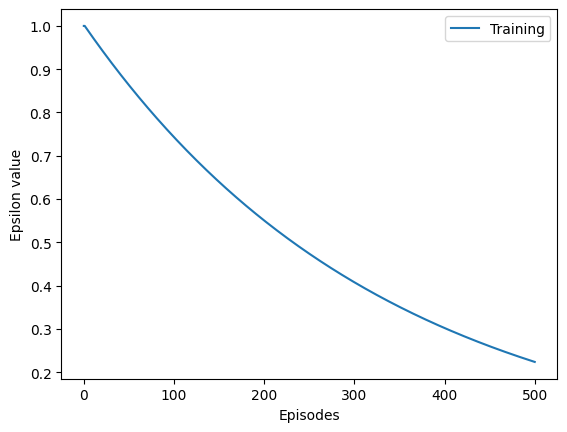

In [ ]:
# Plot epsilon values over episodes
plt.plot(epsilon_episodes)
plt.ylabel('Epsilon value')
plt.xlabel('Episodes')
plt.legend(['Training'], loc='upper right')
matplotlib.rcParams.update({'font.size': 10})
plt.show()

# Print optimal policy

In [ ]:
# Print the optimal policy
for state_index in range(agent.state_size):
    if str(state_index) in agent.Q:
        q_values = agent.Q.get(str(state_index))
        best_action = np.argmax(q_values)
        print("State " + str(state_index) + ", Best action: " + str(best_action))

State 0, Best action: 2
State 1, Best action: 2
State 2, Best action: 1
State 3, Best action: 1
State 4, Best action: 0
State 5, Best action: 1
State 6, Best action: 2
State 7, Best action: 2
State 8, Best action: 0


In [ ]:
# Test an episode
state = env.reset()    # Reset environment, i.e., agent position is set to state 0
terminated = False    # Initialize terminated to False
img_lst = []    # Initialize list to store visualization frames
for step in range(agent.max_steps):
    q_values = agent.Q.get(str(state))
    action = np.argmax(q_values)    # Get the best action based on Q-values
    new_state, reward, terminated, info = env.step(action)    # Perform the action, get return from environment
    print("Current state: " + str(state) + ", Action: " + str(action) + ", New state: " + str(new_state))
    state = new_state

    img = env.render()[0]    # Render current environment image
    img_lst.append(img)  # Append environment images to make animation

    if terminated:    # If agent reaches Goal or Hole
        break    # End episode

print("Reward: " + str(reward))    # Print reward of the test episode
imageio.mimsave('test.gif', img_lst, format='GIF', duration=0.5)


Current state: 0, Action: 2, New state: 1
Current state: 1, Action: 2, New state: 2
Current state: 2, Action: 1, New state: 5
Current state: 5, Action: 1, New state: 8
Reward: 1.0


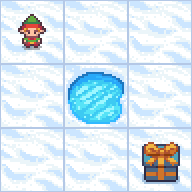

In [ ]:
# Display test result animation
from IPython.display import Image
Image('test.gif')

# Compare and Discuss performance

I think the performance of the optimal policy is similar in both Q-learning and deep Q-learning. It takes the agent the similar amount of steps in both case to reach the goal. The cumulative average reward and step are similar in both case.